# Facial Skincare Recommender System

### Download Dataset from Kaggle

In [ ]:
# import os
# import zipfile
# import pandas as pd

# # Download using Kaggle API
# os.system('kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews')

# # Unzip the downloaded dataset
# with zipfile.ZipFile('sephora-products-and-skincare-reviews.zip', 'r') as zip_ref:
#     zip_ref.extractall('sephora_dataset')

# # Load product information
# products_df = pd.read_csv("sephora_dataset/product_info.csv")

# print(products_df.head()) # for checking purpose 

FileNotFoundError: [Errno 2] No such file or directory: 'sephora-products-and-skincare-reviews.zip'

In [ ]:
import pandas as pd

products_df = pd.read_csv('data/OriDataset/product_info.csv')

C:\Users\lucas\AppData\Local\Temp\ipykernel_10392\2215557563.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews1 = pd.read_csv('data/OriDataset/reviews_0-250.csv')
C:\Users\lucas\AppData\Local\Temp\ipykernel_10392\2215557563.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews4 = pd.read_csv('data/OriDataset/reviews_750-1250.csv')
C:\Users\lucas\AppData\Local\Temp\ipykernel_10392\2215557563.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews5 = pd.read_csv('data/OriDataset/reviews_1250-end.csv')


### Filter Skincare Product only in primary_category, secondary_category, and tertiary_category columns
(remove makeup, fragrance, bath&body, hair, teeth, supplement, etc products)

In [48]:
# Convert product_id to string and strip whitespace
products_df['product_id'] = products_df['product_id'].astype(str).str.strip()

# Filter only 'Skincare' at primary_category 
skincare_products_df = products_df[products_df['primary_category'].str.lower() == 'skincare'].copy()

# Keep only specific secondary categories
allowed_secondary_categories = [
    'Moisturizers', 'Treatments', 'Eye Care', 'Lip Balms & Treatments',
    'Sunscreen', 'Cleansers', 'Masks'
]

skincare_products_df = skincare_products_df[skincare_products_df['secondary_category'].isin(allowed_secondary_categories)].copy()

# Keep only selected tertiary categories
allowed_tertiary_categories = [
    'Moisturizers', 'Face Serums', 'Eye Creams & Treatments', 'Face Sunscreen',
    'Face Wash & Cleansers', 'Face Oils', 'Toners', 'Face Masks', 'Facial Peels',
    'Exfoliators', 'Eye Masks', 'Face Wipes', 'Blemish & Acne Treatments',
    'Night Creams', 'Mists & Essences', 'Sheet Masks', 'Makeup Removers'
]

skincare_products_df = skincare_products_df[skincare_products_df['tertiary_category'].isin(allowed_tertiary_categories)].copy()

# Save to new CSV file
skincare_products_df.to_csv("data/CleanedDataSet/filtered_skincare_products.csv", index=False)
print("Filtered products dataset saved as 'filtered_skincare_products.csv'")

Filtered products dataset saved as 'filtered_skincare_products.csv'


### Filter Reviews to Keep only Skincare Review 

In [50]:
# Load filtered skincare products IDs
filtered_products = pd.read_csv("data/CleanedDataSet/filtered_skincare_products.csv")
skincare_product_ids = set(filtered_products['product_id'].unique())

import glob

# List of file paths
review_files = [
    "data/OriDataSet/reviews_0-250.csv",
    "data/OriDataSet/reviews_250-500.csv",
    "data/OriDataSet/reviews_500-750.csv",
    "data/OriDataSet/reviews_750-1250.csv",
    "data/OriDataSet/reviews_1250-end.csv"
]

# Initialize empty list to store filtered reviews
all_filtered_reviews = []

for file in review_files:
    reviews_df = pd.read_csv(file)
    
    skincare_reviews = reviews_df[reviews_df['product_id'].isin(skincare_product_ids)].copy()
    all_filtered_reviews.append(skincare_reviews)

# Merge all and save as one new file
merged_reviews_df = pd.concat(all_filtered_reviews, ignore_index=True)

# Add sequential review_id
merged_reviews_df['review_id'] = merged_reviews_df.index + 1

# Drop essential missing values
merged_reviews_df.dropna(subset=["author_id", "product_id", "rating", "review_text", "skin_type"], inplace=True)

# Keep valid ratings
merged_reviews_df = merged_reviews_df[(merged_reviews_df["rating"] >= 1) & (merged_reviews_df["rating"] <= 5)]

# Remove duplicates
merged_reviews_df.drop_duplicates(inplace=True)

merged_reviews_df.to_csv("data/CleanedDataSet/filtered_skincare_reviews.csv", index=False)

print(f"\nFinal merged reviews file saved as: filtered_skincare_reviews.csv")
print(f"Total reviews: {len(merged_reviews_df)}")

C:\Users\lucas\AppData\Local\Temp\ipykernel_10392\3593967287.py:20: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv(file)
C:\Users\lucas\AppData\Local\Temp\ipykernel_10392\3593967287.py:20: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv(file)
C:\Users\lucas\AppData\Local\Temp\ipykernel_10392\3593967287.py:20: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv(file)



Final merged reviews file saved as: filtered_skincare_reviews.csv
Total reviews: 801455


## Data Understanding

In [51]:
merged_reviews_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,review_id
1,16140,31124221503,5,1.0,1.0,1,0,1,2023-03-19,"Makeup remover, gentle cleanser, and all aroun...",Best. Cleanser. Ever.,fair,brown,combination,blonde,P7880,Soy Hydrating Gentle Face Cleanser,fresh,39.0,2
2,16141,20246074916,5,1.0,1.0,2,0,2,2023-03-15,I have been using this for almost 10 years. Lo...,The cleanser I have used for 10 years,NaN,hazel,combination,NaN,P7880,Soy Hydrating Gentle Face Cleanser,fresh,39.0,3
3,16142,5182718480,1,0.0,0.0,2,2,0,2023-03-10,I wanted to love this so bad because it felt s...,NaN,mediumTan,brown,combination,brown,P7880,Soy Hydrating Gentle Face Cleanser,fresh,39.0,4
5,16144,27905619860,5,1.0,1.0,2,0,2,2023-03-09,Best facial cleanser I have used! I heard grea...,Hands down best cleanser,light,hazel,combination,brown,P7880,Soy Hydrating Gentle Face Cleanser,fresh,39.0,6
6,16145,8523204146,3,0.0,0.0,1,1,0,2023-03-06,I found this to be just ok - definitely gentle...,NaN,light,hazel,combination,NaN,P7880,Soy Hydrating Gentle Face Cleanser,fresh,39.0,7


In [52]:
merged_reviews_df.shape

(801455, 20)

## Data Preprocessing

In [64]:
import re
import ast
import unicodedata
import pandas as pd

# Input and output file paths
IN_PATH  = "data/CleanedDataSet/filtered_skincare_products.csv"   # raw filtered file
OUT_PATH = "data/CleanedDataSet/products_preprocessed.csv"        # final preprocessed file
SHOW_DEBUG = True

# ------------------------------
# Basic helpers
# ------------------------------
def norm_text(s):
    # Normalize text: lowercase, strip, collapse whitespace
    if not isinstance(s, str):
        s = "" if pd.isna(s) else str(s)
    return re.sub(r"\s+", " ", s.lower().strip())

def map_with_table(text, table):
    # Match text against regex patterns in a table, return first label found
    if not text:
        return None
    for patt, label in table:
        if re.search(patt, text, flags=re.IGNORECASE):
            return label
    return None

# ------------------------------
# Product-type rules 
# ------------------------------
# Map regex patterns from categories/names to standardized product types
TERTIARY_MAP = [
    (r"\beye (creams?(\s*&\s*treatments?)?|masks?|care)\b", "eye treatment"),
    (r"\bface serums?\b", "serum"),
    (r"\bserums?\b", "serum"),
    (r"\bface oils?\b|\bfacial oils?\b", "face oil"),
    (r"\bface sunscreen\b|\bsunscreens?\b|\bsun care\b|\bspf\b", "sunscreen"),
    (r"\bmoisturizers?\b|\bnight creams?\b|\bgel[- ]?creams?\b|\bface creams?\b|\blotions?\b|\bemulsions?\b", "moisturizer"),
    (r"\bface masks?\b|\bsheet masks?\b|\bsleeping masks?\b|\bovernight masks?\b|\bclay masks?\b|\bmud masks?\b", "face mask"),
    (r"\bface wipes\b|\bmakeup removers?\b", "makeup remover"),
    (r"\bcleansers?\b|\bface wash\b|\bmicellar\b", "cleanser"),
    (r"\btoners?\b|\bmists? & essences?\b|\bessences?\b", "toner"),
    (r"\bblemish\s*&\s*acne treatments?\b|\bspot (treatments?|correctors?)\b|\bacne spot\b", "spot treatment"),
    (r"\bexfoliators?\b|\bexfoliants?\b|\bpeels?\b|\bscrubs?\b|\b(aha|bha|pha)\b", "exfoliator"),
]
SECONDARY_MAP = TERTIARY_MAP  # Reuse same mapping for secondary

# Fallback rules if product type not found in categories
NAME_RULES = [
    (r"\beye (cream|serum|gel|balm|mask|treatment)\b", "eye treatment"),
    (r"\bface oil|facial oil|night oil|firming oil\b|\boil\b(?!\s*cleanser)", "face oil"),
    (r"\bface wipes\b|\bmakeup remover\b", "makeup remover"),
    (r"\b(cleanser|cleansing|face wash|micellar|balm cleanser|oil cleanser)\b", "cleanser"),
    (r"\b(toner|tonique)\b|\bmists?\b|\bessence\b(?!\s*serum)", "toner"),
    (r"\b(serum|ampoule|booster)\b(?!\s*mask)|\bessence serum\b", "serum"),
    (r"\b(sunscreen|sun screen|spf)\b", "sunscreen"),
    (r"\b(mask|sheet mask|sleeping mask|wash[- ]?off mask|overnight mask|mud mask|clay mask)\b", "face mask"),
    (r"\b(spot (treatment|corrector)|acne spot|blemish treatment)\b", "spot treatment"),
    (r"\b(exfoliator|exfoliant|peel|aha|bha|pha|scrub)\b", "exfoliator"),
    (r"\b(moisturizer|moisturiser|cream|lotion|emulsion|gel[- ]?cream|face cream)\b", "moisturizer"),
]

def detect_product_type(row):
    # Infer product type from tertiary > secondary > name (priority order)
    name = norm_text(row.get("product_name", ""))
    sec  = norm_text(row.get("secondary_category", ""))
    ter  = norm_text(row.get("tertiary_category", ""))

    # Tertiary category first
    label = map_with_table(ter, TERTIARY_MAP)
    if label: return label

    # Secondary (skip if too generic like 'treatment')
    is_generic = bool(re.fullmatch(r"(treatment|treatments)", sec.strip()))
    if not is_generic:
        label = map_with_table(sec, SECONDARY_MAP)
        if label: return label

    # Fallback: check product name
    label = map_with_table(name, NAME_RULES)
    if label: return label

    return "other"

# ------------------------------
# Skin type + concern rules 
# ------------------------------
# Regex patterns to detect skin types from text
SKIN_TYPE_PATTERNS = [
    (r"\b(?:good|best)\s*for:\s*oily\b", "oily"),
    (r"\b(?:good|best)\s*for:\s*dry\b", "dry"),
    (r"\b(?:good|best)\s*for:\s*combination\b", "combination"),
    (r"\b(?:good|best)\s*for:\s*sensitive\b", "sensitive"),
    (r"\b(?:good|best)\s*for:\s*normal\b", "normal"),
    (r"\b(oily skin|oily)\b", "oily"),
    (r"\b(dry skin|dry)\b", "dry"),
    (r"\b(combination skin|combination|combo)\b", "combination"),
    (r"\b(sensitive skin|sensitive)\b", "sensitive"),
    (r"\b(normal skin|normal)\b", "normal"),
    (r"\bfor\s+sensitive\s+skin\b", "sensitive"),
    (r"\bsuitable\s+for\s+sensitive\b", "sensitive"),
    (r"\bfor\s+sensitive\b", "sensitive"),
    (r"\bhypoallergenic\b", "sensitive"),
    (r"\bgentle\b", "sensitive"),
]

# Regex patterns to detect skin concerns from claims or product name
SKIN_CONCERN_PATTERNS = [
    (r"\b(acne|blemish|breakout|pimple)\b", "acne"),
    (r"\bpores?\b", "pores"),
    (r"\b(dark spot|hyperpigment|discoloration|melasma)\b", "hyperpigmentation"),
    (r"\b(wrinkle|fine line|anti[- ]?aging|firming|loss of firmness|elasticity)\b", "aging"),
    (r"\b(redness|rosacea|irritation|calming|soothing)\b", "redness"),
    (r"\b(dryness|dehydration|hydrating|moisturizing|moisturising|barrier)\b", "dehydration"),
    (r"\b(dull(ness)?|brighten(ing)?|glow|radiance)\b", "dullness"),
    (r"\boil(y| control|iness)\b", "oil-control"),
    (r"\b(blackhead|whitehead|congestion)\b", "blackheads"),
    (r"\b(uneven (tone|texture)|texture|resurfacing)\b", "texture"),
    (r"\b(dark circle|dark circles)\b", "dark-circles"),
]

# Ingredient-based concern mapping
INGREDIENT_CONCERN_PATTERNS = [
    (r"\b(salicylic acid|beta hydroxy|bha|willow bark|benzoyl peroxide|sulfur|zinc pca|zinc)\b", {"acne","pores","oil-control"}),
    (r"\b(kaolin|bentonite|clay|charcoal)\b", {"pores","oil-control"}),
    (r"\b(tea tree|melaleuca)\b", {"acne"}),
    (r"\b(hyaluronic acid|sodium hyaluronate|glycerin|panthenol|urea|betaine|trehalose|aloe)\b", {"dehydration"}),
    (r"\b(ceramide|ceramides|cholesterol|squalane|squalene|shea|shea butter)\b", {"dehydration"}),
    (r"\b(retinol|retinal|retinoate|bakuchiol|peptide|matrixyl|collagen|coenzyme ?q10|ubiquinone)\b", {"aging"}),
    (r"\b(vitamin ?c|ascorbic|ascorbyl|ethyl ascorbic|magnesium ascorbyl|sodium ascorbyl|alpha arbutin|tranexamic|azelaic|kojic|licorice|glycyrrhiza)\b", {"hyperpigmentation","dullness"}),
    (r"\b(centella|cica|madecassoside|asiaticoside|allantoin|bisabolol|beta glucan|green tea|oat|colloidal oatmeal)\b", {"redness"}),
    (r"\b(aha|glycolic|lactic|mandelic|tartaric|citric|pha|gluconolactone|lactobionic)\b", {"texture","dullness"}),
]

def to_list_from_highlights(val):
    # Parse highlights column into list (safe eval or regex split)
    if pd.isna(val):
        return []
    s = str(val).strip()
    try:
        parsed = ast.literal_eval(s)
        if isinstance(parsed, list):
            return [str(x) for x in parsed]
    except Exception:
        pass
    return [t.strip() for t in re.split(r"[,\|;/]+", s) if t.strip()]

def extract_skin_types_from_highlights_and_name(highlights_list, product_name):
    # Detect skin types from highlights + product name
    stypes = set()
    for raw in highlights_list:
        t = norm_text(raw)
        for patt, lab in SKIN_TYPE_PATTERNS:
            if re.search(patt, t):
                stypes.add(lab)
    pname = norm_text(product_name)
    if re.search(r"\bsensitive\b", pname):
        stypes.add("sensitive")
    return ",".join(sorted(stypes))

def extract_concerns_from_highlights_and_name(highlights_list, product_name):
    # Detect skin concerns from highlights + product name
    concerns = set()
    for raw in highlights_list:
        t = norm_text(raw)
        for patt, lab in SKIN_CONCERN_PATTERNS:
            if re.search(patt, t):
                concerns.add(lab)
    pname = norm_text(product_name)
    for patt, lab in SKIN_CONCERN_PATTERNS:
        if re.search(patt, pname):
            concerns.add(lab)
    return concerns

def extract_concerns_from_ingredients(ingredients_text):
    # Detect skin concerns directly from ingredient list
    concerns = set()
    ing = norm_text(ingredients_text)
    for patt, labs in INGREDIENT_CONCERN_PATTERNS:
        if re.search(patt, ing):
            concerns |= labs
    return concerns

# ------------------------------
# Text cleaning for vectorization
# ------------------------------

STOPWORDS = {
    "a","an","the","and","or","but","to","of","for","on","in","into","with","by","from","as",
    "it","its","this","that","these","those","is","are","was","were","be","been","being",
    "at","up","down","over","under","about","than","then","so","such","very","more","most",
    "less","least","you","your","yours","we","our","ours","they","their","theirs","he","she","his","her","them","i","me","my","mine"
}

PHRASES = [
    (r"\bhyaluronic acid\b", "hyaluronic_acid"),
    (r"\bsodium hyaluronate\b", "sodium_hyaluronate"),
    (r"\bsalicylic acid\b", "salicylic_acid"),
    (r"\bbenzoyl peroxide\b", "benzoyl_peroxide"),
    (r"\balpha hydroxy\b", "alpha_hydroxy"),
    (r"\bbeta hydroxy\b", "beta_hydroxy"),
    (r"\bpolyhydroxy\b", "polyhydroxy"),
    (r"\bvitamin c\b", "vitamin_c"),
    (r"\bvitamin e\b", "vitamin_e"),
    (r"\bcoenzyme q10\b|\bubiquinone\b", "coenzyme_q10"),
    (r"\btea tree\b", "tea_tree"),
    (r"\bcentella asiatica\b|\bcica\b", "centella_asiatica"),
    (r"\bgreen tea\b", "green_tea"),
    (r"\bniacinamide\b", "niacinamide"),
    (r"\bretino(l|id|ate|nal)\b", "retinoid"),
    (r"\baha\b", "aha"),
    (r"\bbha\b", "bha"),
    (r"\bpha\b", "pha"),
    (r"\bspf\s*\d+\b", lambda m: "spf_" + re.sub(r"\D", "", m.group(0))),
]

def deaccent(s):
    # Remove accents/diacritics from text 
    return unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")

def strip_html(s):
    # Remove HTML tags
    return re.sub(r"<[^>]+>", " ", s)

def basic_normalize(s):
    # General normalization: lowercase, strip HTML, remove symbols/numbers
    if not isinstance(s, str):
        s = "" if pd.isna(s) else str(s)
    s = s.lower()
    s = strip_html(s)
    s = deaccent(s)
    s = re.sub(r"[\/\+]", " ", s)                # split slashes/plus
    s = re.sub(r"[^a-z0-9\-\_\s]", " ", s)       # keep hyphen/underscore
    s = re.sub(r"\b\d+\b", " ", s)               # drop standalone numbers
    s = re.sub(r"\s+", " ", s).strip()
    return s

def apply_phrases(s):
    # Replace key phrases with normalized tokens
    for patt, repl in PHRASES:
        s = re.sub(patt, repl if isinstance(repl, str) else repl, s, flags=re.IGNORECASE)
    return s

def clean_text(s):
    # Full text cleaning pipeline for vectorization
    s = "" if s is None else str(s)
    s = apply_phrases(s)
    s = basic_normalize(s)
    toks = s.split()
    toks = [t for t in toks if (t not in STOPWORDS and len(t) > 1)]
    # Remove duplicates while keeping word order
    seen, out = set(), []
    for t in toks:
        if t not in seen:
            out.append(t); seen.add(t)
    return " ".join(out)

# ------------------------------
# Build combined content
# ------------------------------
def combine_categories(row):
    # Combine primary + secondary + tertiary categories into one string
    parts = [
        str(row.get("primary_category", "") or ""),
        str(row.get("secondary_category", "") or ""),
        str(row.get("tertiary_category", "") or "")
    ]
    return " ".join([p for p in parts if p]).strip()

def parse_highlights_text(val):
    # Convert highlights list into plain text string
    lst = to_list_from_highlights(val)
    return " ".join(lst)

def build_product_content(row):
    # Build final product_content field with weighted chunks
    chunks = [
        row.get("clean_product_name", ""),
        row.get("clean_brand_name", ""),
        row.get("clean_categories", ""),
        row.get("clean_highlights", ""),
        row.get("clean_ingredients", ""),
        row.get("clean_product_type", ""),
        row.get("clean_skin_type", ""),
        row.get("clean_skin_concern", ""),
    ]

    # Weight ingredients higher (add twice more)
    ingredients = row.get("clean_ingredients", "")
    chunks += [ingredients] * 2

    return " ".join([c for c in chunks if c]).strip()

# ------------------------------
# Main pipeline
# ------------------------------
def main():
    # Load dataset
    df = pd.read_csv(IN_PATH, encoding="utf-8")

    # Defensive defaults: ensure required columns exist
    for c in ["product_id","product_name","brand_name","ingredients","highlights",
              "primary_category","secondary_category","tertiary_category","price_usd", "rating", "reviews"]:
        if c not in df.columns:
            df[c] = ""

    # (A) RULE-BASED ENRICHMENT 
    df["product_type"] = df.apply(detect_product_type, axis=1)  # infer product type
    df["_highlights_list"] = df["highlights"].apply(to_list_from_highlights)  # parse highlights
    df["skin_type"] = df.apply(  # infer skin type
        lambda r: extract_skin_types_from_highlights_and_name(r["_highlights_list"], r["product_name"]),
        axis=1
    )
    df["ingredients"] = df["ingredients"].fillna("").astype(str)  # ensure string ingredients

    # Skin concern = union of claims/name + ingredients
    concerns_from_claims = df.apply(
        lambda r: extract_concerns_from_highlights_and_name(r["_highlights_list"], r["product_name"]),
        axis=1
    )
    concerns_from_ings = df["ingredients"].apply(extract_concerns_from_ingredients)
    df["skin_concern"] = [
        ",".join(sorted(set(a) | set(b)))
        for a, b in zip(concerns_from_claims, concerns_from_ings)
    ]

    # Convert price to numeric
    df["price_usd"] = pd.to_numeric(df["price_usd"], errors="coerce")

    df["rating"] = pd.to_numeric(df.get("rating"), errors="coerce")
    df["reviews"] = pd.to_numeric(df.get("reviews"), errors="coerce")

    # (B) TEXT CLEANING + CONTENT 
    df["_categories_raw"] = df.apply(combine_categories, axis=1)
    df["_highlights_text"] = df["highlights"].apply(parse_highlights_text)

    # Clean text fields
    df["clean_product_name"] = df["product_name"].apply(clean_text)
    df["clean_brand_name"]   = df["brand_name"].apply(clean_text)
    df["clean_categories"]   = df["_categories_raw"].apply(clean_text)
    df["clean_highlights"]   = df["_highlights_text"].apply(clean_text)
    df["clean_ingredients"]  = df["ingredients"].apply(clean_text)
    df["clean_product_type"] = df["product_type"].apply(clean_text)
    df["clean_skin_type"]    = df["skin_type"].apply(clean_text)
    df["clean_skin_concern"] = df["skin_concern"].apply(clean_text)

    # Build final product_content field (for TF-IDF)
    df["product_content"] = df.apply(build_product_content, axis=1)

    # Save final
    keep_cols = [
        "product_id","product_name","brand_name","ingredients","highlights",
        "primary_category","secondary_category","tertiary_category","price_usd", "rating", "reviews", 
        "product_type","skin_type","skin_concern","product_content"
    ]
    for c in keep_cols:
        if c not in df.columns:
            df[c] = ""
    df[keep_cols].to_csv(OUT_PATH, index=False)

    # Debug sample output
    if SHOW_DEBUG:
        print(f"Final products preprocessed file saved as: {OUT_PATH}")
        print("Sample product_content:")
        print(df["product_content"].head(5).to_string(index=False))

if __name__ == "__main__":
    main()

Final products preprocessed file saved as: data/CleanedDataSet/products_preprocessed.csv
Sample product_content:
genius sleeping collagen moisturizer algenist s...
genius liquid collagen serum algenist skincare ...
triple algae eye renewal balm cream algenist sk...
sublime defense ultra lightweight uv fluid spf_...
genius ultimate anti-aging cream algenist skinc...


### Merging Reciew and Product DataFrames Together based on product_id

In [65]:
reviews_df = merged_reviews_df[['author_id', 'product_id', 'product_name', 'brand_name','rating', 'skin_type']]

df_review = reviews_df.merge(skincare_products_df[['product_id', 'price_usd', 'secondary_category', 'tertiary_category']], 
                            on='product_id', how='left')
print(df_review.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801455 entries, 0 to 801454
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   author_id           801455 non-null  object 
 1   product_id          801455 non-null  object 
 2   product_name        801455 non-null  object 
 3   brand_name          801455 non-null  object 
 4   rating              801455 non-null  int64  
 5   skin_type           801455 non-null  object 
 6   price_usd           801455 non-null  float64
 7   secondary_category  801455 non-null  object 
 8   tertiary_category   801455 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 55.0+ MB
None


Duplicated Row

In [66]:
merged_reviews_df.duplicated().sum()

0

In [67]:
df_review.duplicated().sum()

1838

In [68]:
df_review = df_review.drop_duplicates(subset=['author_id', 'product_id'], keep='last')
df_review.shape

(798983, 9)

Missing Value

In [69]:
df_review.isnull().sum()

author_id             0
product_id            0
product_name          0
brand_name            0
rating                0
skin_type             0
price_usd             0
secondary_category    0
tertiary_category     0
dtype: int64

Convert to lovercase and replace unknown to the missing value

In [70]:
df_review['skin_type'] = df_review['skin_type'].str.lower().fillna('unknown')

# Modeling

## Content-Based Filtering

### TF-IDF Vectorizer

In [74]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed data
df = pd.read_csv("data/CleanedDataSet/products_preprocessed.csv")

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['product_content'])

# for checking purpose
print(df[['product_name', 'product_content']].head())
print("TF-IDF shape: " + str(tfidf_matrix.shape))
print("Feature names: " + str(vectorizer.get_feature_names_out()[:50]))


                                        product_name  \
0               GENIUS Sleeping Collagen Moisturizer   
1                       GENIUS Liquid Collagen Serum   
2            Triple Algae Eye Renewal Balm Eye Cream   
3  SUBLIME DEFENSE Ultra Lightweight UV Defense F...   
4                   GENIUS Ultimate Anti-Aging Cream   

                                     product_content  
0  genius sleeping collagen moisturizer algenist ...  
1  genius liquid collagen serum algenist skincare...  
2  triple algae eye renewal balm cream algenist s...  
3  sublime defense ultra lightweight uv fluid spf...  
4  genius ultimate anti-aging cream algenist skin...  
TF-IDF shape: (1803, 4872)
Feature names: ['100h' '10eicosanedioate' '14m' '15ml' '1st' '20k' '24k' '25th' '360o'
 '3d' '40b' '5x' '72h' '7m' 'aa' 'abeille' 'abeitate' 'abelmo'
 'abelmoschus' 'abies' 'abietata' 'abrial' 'absinthium' 'absolue'
 'absolute' 'absorbing' 'absorption' 'abyssinica' 'ac' 'acacia' 'acacial'
 'acai' 'acanthi

### Recommending Skincare Products

In [75]:
import re
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def contentbased_recommender(
    product_type=None,
    skin_type=None,
    skin_concern=None,
    concern_match="all",
    max_price=None,
    n=10
):
    # ---- helpers ----
    def _to_set(x):
        if x is None or (isinstance(x, float) and pd.isna(x)):
            return set()
        if isinstance(x, (list, tuple, set)):
            return {str(t).strip().lower() for t in x if str(t).strip()}
        return {t.strip().lower() for t in re.split(r"[;,/|]", str(x)) if t.strip()}

    req_type    = str(product_type).strip().lower() if product_type else None
    req_skin    = str(skin_type).strip().lower()    if skin_type    else None
    req_concern = _to_set(skin_concern)

    # ---- build profile text for TF-IDF ----
    tokens = []
    if req_type:    tokens.append(req_type)
    if req_skin:    tokens.append(req_skin)
    if req_concern: tokens.extend(req_concern)
    profile_text = " ".join(tokens).strip() or "skincare"

    # vectorize profile
    qv = vectorizer.transform([profile_text])
    sims = cosine_similarity(qv, tfidf_matrix).ravel()

    # numeric columns
    price_col   = pd.to_numeric(df.get("price_usd", np.nan), errors="coerce")
    rating_col  = pd.to_numeric(df.get("rating", np.nan), errors="coerce").fillna(0.0)
    reviews_col = pd.to_numeric(df.get("reviews", 0), errors="coerce").fillna(0).astype(int)

    # filter candidates
    rows = []
    for i, sim in enumerate(sims):
        row = df.iloc[i]

        # product type filter
        if req_type and str(row.get("product_type","")).strip().lower() != req_type:
            continue

        # skin type filter
        row_skin = str(row.get("skin_type","")).strip().lower()
        if req_skin and row_skin != req_skin:
            continue

        # skin concern filter
        row_concern = _to_set(row.get("skin_concern",""))
        if req_concern:
            if concern_match == "all":
                if not req_concern.issubset(row_concern):
                    continue
            else:  # "any"
                if row_concern.isdisjoint(req_concern):
                    continue

        # price filter
        p = price_col.iat[i]
        if max_price is not None and (pd.isna(p) or p > float(max_price)):
            continue

        rows.append({
            "product_name": row.get("product_name",""),
            "brand_name": row.get("brand_name",""),
            "product_type": row.get("product_type",""),
            "skin_type": row.get("skin_type",""),
            "skin_concern": row.get("skin_concern",""),
            "price_usd": row.get("price_usd",""),
            "rating": rating_col.iat[i],
            "reviews": reviews_col.iat[i],
            "similarity": float(sim)
        })

    out = pd.DataFrame(rows)
    if out.empty:
        return out

    # final ranking
    out = out.sort_values(
        by=["similarity","rating","reviews"],
        ascending=[False, False, False]
    ).head(n)

    out["similarity"] = out["similarity"].round(4)
    return out


In [76]:
#test
display(contentbased_recommender(
    product_type="moisturizer",
    skin_type="dry",
    skin_concern={"dehydration"},
    concern_match="all",
    max_price=100,
    n=20
))

display(contentbased_recommender(
    product_type="eye treatment",
    skin_concern={"dark-circles","texture"},
    concern_match="all",
    max_price=120,
    n=10
))


,product_name,brand_name,product_type,skin_type,skin_concern,price_usd,rating,reviews,similarity
25,SuperSolutions 10% Urea Moisturizer Textured S...,The INKEY List,moisturizer,dry,"dehydration,dullness,redness,texture",19.99,4.1935,62,0.1331
21,Hydra Prep Soothing & Hydrating Gel,Shani Darden Skin Care,moisturizer,dry,"dehydration,redness",38.00,0.0000,0,0.1112
9,Hydra Life Intense Sorbet Crème Moisturizer,Dior,moisturizer,dry,dehydration,85.00,5.0000,3,0.1054
8,Intensive Moisture Balance Moisturizer,Dermalogica,moisturizer,dry,"dehydration,dullness,hyperpigmentation,redness...",47.00,4.4667,150,0.0918
15,Priming Moisturizer Rich Face Cream with Ceram...,Glossier,moisturizer,dry,"dehydration,dullness,texture",35.00,4.0500,20,0.0902
3,Vinosource-Hydra SOS Intense Hydration Moistur...,Caudalie,moisturizer,dry,"dehydration,dullness,texture",45.00,4.0697,502,0.0886
12,Ultra Repair Cream Intense Hydration,First Aid Beauty,moisturizer,dry,"dehydration,dullness,hyperpigmentation,redness",38.00,4.5200,7539,0.0868
23,Superscreen Daily Moisturizer Sunscreen SPF 40...,Supergoop!,moisturizer,dry,dehydration,44.00,3.6997,646,0.0865
19,Overnight Glow Dark Spot Sleeping Cream,REN Clean Skincare,moisturizer,dry,"aging,dehydration,dullness,hyperpigmentation,r...",55.00,4.1408,476,0.0821
13,Rich Bitch Cactus + Vitamin C Moisturizer,Freck Beauty,moisturizer,dry,"dehydration,dullness,hyperpigmentation,redness",34.00,4.3784,222,0.0799


,product_name,brand_name,product_type,skin_type,skin_concern,price_usd,rating,reviews,similarity
53,Lift & Contour 1% Bakuchiol & Peptide Eye Serum,Wishful,eye treatment,NaN,"aging,dark-circles,dehydration,dullness,rednes...",45.00,4.0000,26,0.1833
38,White Lucent Anti-Dark Circles Eye Cream,Shiseido,eye treatment,NaN,"aging,dark-circles,dehydration,dullness,hyperp...",65.00,3.5878,393,0.1813
1,Bright Eyes Collagen-Infused Brightening Collo...,BeautyBio,eye treatment,NaN,"aging,dark-circles,dehydration,dullness,texture",40.00,4.0594,202,0.1806
37,Benefiance WrinkleResist24 Pure Retinol Expres...,Shiseido,eye treatment,NaN,"aging,dark-circles,dehydration,dullness,hyperp...",70.00,4.4220,500,0.1670
35,Brightening Dark Circle Eye Cream,REN Clean Skincare,eye treatment,NaN,"dark-circles,dehydration,dullness,redness,texture",51.00,4.3027,370,0.1654
48,Brighten-i Eye Cream,The INKEY List,eye treatment,NaN,"dark-circles,dehydration,dullness,texture",12.99,3.7617,1137,0.1647
25,Powerful-Strength Dark Circle Reducing Vitamin...,Kiehl's Since 1851,eye treatment,NaN,"aging,dark-circles,dehydration,dullness,hyperp...",55.00,3.8646,1041,0.1616
32,C5 Super Boost Vitamin C Eye Cream,Paula's Choice,eye treatment,NaN,"aging,dark-circles,dehydration,dullness,hyperp...",39.00,4.5000,340,0.1519
29,Banana Bright+ Vitamin CC Eye Sticks,OLEHENRIKSEN,eye treatment,NaN,"dark-circles,dehydration,dullness,hyperpigment...",34.00,4.6040,298,0.1481
33,Instant FIRMx Eye Temporary Eye Tightener,Peter Thomas Roth,eye treatment,NaN,"aging,dark-circles,dehydration,dullness,hyperp...",38.00,3.3254,627,0.1480


### Evaluation metrics

In [77]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error

df = pd.read_csv("data/CleanedDataSet/products_preprocessed.csv")

def evaluate_mse_rmse_mae_skin(
    reviews,
    top_n=5,
    sample_size=500,
    liked_threshold=3.5
):
    # 1) Basic cleaning
    for col in ["author_id", "product_id", "rating"]:
        if col not in reviews.columns:
            raise ValueError(f"Missing column in reviews: {col}")

    reviews = reviews.copy()
    reviews["rating"] = pd.to_numeric(reviews["rating"], errors="coerce")
    reviews = reviews.dropna(subset=["author_id", "product_id", "rating"])

    # 2) Keep only products that exist in df
    if "product_id" not in df.columns:
        df["product_id"] = np.arange(len(df))
    valid_ids = set(df["product_id"])
    reviews = reviews[reviews["product_id"].isin(valid_ids)]

    # 3) Build user -> liked items (users need ≥2 likes)
    likes = (reviews[reviews["rating"] >= liked_threshold]
             .groupby("author_id")["product_id"].apply(list).to_dict())
    eligible = [(u, lst) for u, lst in likes.items() if len(set(lst)) >= 2]
    if not eligible:
        print("No eligible users for evaluation.")
        return None

    # sample users (fully random each run)
    if sample_size and sample_size < len(eligible):
        idx = np.random.choice(len(eligible), size=sample_size, replace=False)
        eligible = [eligible[i] for i in idx]

    # 4) Evaluate: leave one liked item out
    y_true, y_pred, abs_errors, skipped = [], [], [], 0

    for user, liked in eligible:
        liked = [pid for pid in liked if pid in valid_ids]
        if len(liked) < 2:
            skipped += 1
            continue

        # hold out one liked product
        q = np.random.choice(liked)
        qrow = df.loc[df["product_id"] == q]
        if qrow.empty:
            skipped += 1
            continue
        qrow = qrow.iloc[0]

        # get recommendations from profile
        recs = contentbased_recommender(
            product_type=qrow.get("product_type"),
            skin_type=qrow.get("skin_type"),
            skin_concern=qrow.get("skin_concern").split(",") if isinstance(qrow.get("skin_concern"), str) else None,
            concern_match="all",
            max_price=qrow.get("price_usd"),
            n=top_n
        )
        if recs is None or recs.empty:
            skipped += 1
            continue

        # predict = similarity-weighted mean of rec ratings
        r_ratings = pd.to_numeric(recs.get("rating"), errors="coerce").fillna(0).to_numpy()
        r_sims = pd.to_numeric(recs.get("similarity"), errors="coerce").fillna(0).to_numpy()
        if r_ratings.size == 0 or r_sims.sum() == 0:
            skipped += 1
            continue
        pred_rating = float(np.average(r_ratings, weights=np.clip(r_sims, 1e-6, None)))

        # true = this user's rating of held-out product
        held = reviews.loc[(reviews["author_id"] == user) & (reviews["product_id"] == q), "rating"]
        if held.empty:
            skipped += 1
            continue

        true_rating = float(held.iloc[0])
        y_true.append(true_rating)
        y_pred.append(pred_rating)
        abs_errors.append(abs(true_rating - pred_rating))

    if not y_true:
        print("No valid predictions made.")
        return None

    mse_val = mean_squared_error(y_true, y_pred)
    rmse_val = sqrt(mse_val)
    mae_val = np.mean(abs_errors)

    print(f"\n=== MSE/RMSE/MAE Evaluation (n={len(y_true)}, skipped={skipped}) ===")
    print(f"MSE:  {mse_val:.4f}")
    print(f"RMSE: {rmse_val:.4f}")
    print(f"MAE:  {mae_val:.4f}")

    return {"mse": mse_val, "rmse": rmse_val, "mae": mae_val, "n_evaluated": len(y_true), "skipped": skipped}


In [78]:
reviews = pd.read_csv("data/CleanedDataSet/filtered_skincare_reviews.csv")

# Run content-based evaluation
content_metrics = evaluate_mse_rmse_mae_skin(
    reviews,
    top_n=5,
    sample_size=100,
    liked_threshold=4
)



C:\Users\lucas\AppData\Local\Temp\ipykernel_10392\3435530953.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv("data/CleanedDataSet/filtered_skincare_reviews.csv")



=== MSE/RMSE/MAE Evaluation (n=100, skipped=0) ===
MSE:  0.7527
RMSE: 0.8676
MAE:  0.7362


## Collaborative Filtering

### SVD

In [81]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV, train_test_split
from collections import defaultdict
from tqdm import tqdm
import pickle

# Prepare data
df = df_review[['author_id', 'product_id', 'rating', 'product_name', 'brand_name', 'skin_type', 'price_usd', 'secondary_category', 'tertiary_category']].copy()

# Validate ratings (1–5)
df = df[df['rating'].between(1, 5)]
print(f"Shape after grouping and rating validation: {df.shape}")
print(f"Unique users: {df['author_id'].nunique()}, Unique products: {df['product_id'].nunique()}")

# Filter sparse entries
min_user_reviews = 5
min_product_reviews = 10
user_counts = df['author_id'].value_counts()
product_counts = df['product_id'].value_counts()
valid_users = user_counts[user_counts >= min_user_reviews].index
valid_products = product_counts[product_counts >= min_product_reviews].index
df = df[df['author_id'].isin(valid_users) & df['product_id'].isin(valid_products)]
print(f"Filtered shape (users≥{min_user_reviews}, products≥{min_product_reviews}): {df.shape}")
print(f"Sparsity: {1 - len(df) / (df['author_id'].nunique() * df['product_id'].nunique()):.4f}")

# Check for sufficient data
if df.empty:
    raise ValueError("Filtered dataset is empty. Adjust min_user_reviews or min_product_reviews.")

# Check for NaN values
if df[['author_id', 'product_id', 'rating']].isna().any().any():
    print("Warning: NaN values found in critical columns. Dropping NaN rows.")
    df = df.dropna(subset=['author_id', 'product_id', 'rating'])

# Save the training dataframe as CSV
training_csv_filename = "data/CleanedDataSet/collaborative_training_data.csv"
df.to_csv(training_csv_filename, index=False)
print(f"Training data saved as: {training_csv_filename}")
print(f"Training CSV contains:")
print(f"- {len(df)} records")
print(f"- {df['author_id'].nunique()} unique users")
print(f"- {df['product_id'].nunique()} unique products")
print(f"- Columns: {list(df.columns)}")

# Verify the saved file
verify_df = pd.read_csv(training_csv_filename)
print(f"\nVerification - loaded CSV has {len(verify_df)} rows and {len(verify_df.columns)} columns")

# Load into Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['author_id', 'product_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# GridSearchCV for SVD with progress bar
param_grid = {
    'n_factors': [10, 20, 50],
    'n_epochs': [20, 30],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.1, 0.2]
}
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=1)
print("Running GridSearchCV for SVD...")
gs_svd.fit(data)
print("\nBest SVD Parameters:")
print(f"RMSE: {gs_svd.best_score['rmse']:.3f}, Params: {gs_svd.best_params['rmse']}")
print(f"MAE: {gs_svd.best_score['mae']:.3f}, Params: {gs_svd.best_params['mae']}")

# Train SVD with best parameters
best_svd = SVD(
    n_factors=gs_svd.best_params['rmse']['n_factors'],
    n_epochs=gs_svd.best_params['rmse']['n_epochs'],
    lr_all=gs_svd.best_params['rmse']['lr_all'],
    reg_all=gs_svd.best_params['rmse']['reg_all'],
    random_state=42
)
best_svd.fit(trainset)

# Save the trained SVD model and trainset to .pkl files
with open('models/svd_model.pkl', 'wb') as f:
    pickle.dump(best_svd, f)
with open('models/trainset.pkl', 'wb') as f:
    pickle.dump(trainset, f)
print("Model and trainset saved to 'models/svd_model.pkl' and 'models/trainset.pkl'.")

# Calculate evaluation metrics
svd_preds = best_svd.test(testset)
svd_rmse = accuracy.rmse(svd_preds, verbose=True)
svd_mae = accuracy.mae(svd_preds, verbose=True)
svd_mse = np.mean([(pred.est - pred.r_ui) ** 2 for pred in svd_preds])
svd_accuracy = np.mean([1 if round(pred.est) == round(pred.r_ui) else 0 for pred in svd_preds])

# Precision@K, Recall@K, and F1@K with progress bar
def precision_recall_f1_at_k(predictions, k=5, threshold=4.0):
    user_est_true = defaultdict(list)
    for pred in tqdm(predictions, desc="Building user predictions"):
        user_est_true[pred.uid].append((pred.est, pred.r_ui))
    
    precisions, recalls = [], []
    for uid, ratings in tqdm(user_est_true.items(), desc="Calculating metrics"):
        ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for _, true_r in ratings)
        n_rec_k = sum((est >= threshold) for est, _ in ratings[:k])
        n_rel_and_rec_k = sum((true_r >= threshold) for _, true_r in ratings[:k])
        precision = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recall = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
        precisions.append(precision)
        recalls.append(recall)
        if n_rec_k == 0 or n_rel == 0:
            print(f"User {uid}: Zero precision/recall (n_rec_k={n_rec_k}, n_rel={n_rel})")
    
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall) if (avg_precision + avg_recall) != 0 else 0
    return avg_precision, avg_recall, f1


Shape after grouping and rating validation: (798983, 9)
Unique users: 455845, Unique products: 1765
Filtered shape (users≥5, products≥10): (187770, 9)
Sparsity: 0.9942
Training data saved as: data/CleanedDataSet/collaborative_training_data.csv
Training CSV contains:
- 187770 records
- 20855 unique users
- 1544 unique products
- Columns: ['author_id', 'product_id', 'rating', 'product_name', 'brand_name', 'skin_type', 'price_usd', 'secondary_category', 'tertiary_category']

Verification - loaded CSV has 187770 rows and 9 columns
Running GridSearchCV for SVD...

Best SVD Parameters:
RMSE: 0.858, Params: {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
MAE: 0.581, Params: {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
Model and trainset saved to 'models/svd_model.pkl' and 'models/trainset.pkl'.
RMSE: 0.8517
MAE:  0.5752


In [82]:

# Evaluate Precision@K, Recall@K, and F1@K
svd_prec, svd_rec, svd_f1 = precision_recall_f1_at_k(svd_preds, k=5, threshold=4.0)



Calculating metrics: 100%|██████████| 16287/16287 [00:00<00:00, 101556.11it/s]

User 6064061494: Zero precision/recall (n_rec_k=0, n_rel=0)
User 8329057844: Zero precision/recall (n_rec_k=0, n_rel=2)
User 6521784323: Zero precision/recall (n_rec_k=0, n_rel=1)
User 1387153597: Zero precision/recall (n_rec_k=0, n_rel=1)
User 8449561965: Zero precision/recall (n_rec_k=0, n_rel=1)
User 2824877486: Zero precision/recall (n_rec_k=0, n_rel=0)
User 2249756960: Zero precision/recall (n_rec_k=0, n_rel=3)
User 22356537078: Zero precision/recall (n_rec_k=0, n_rel=0)
User 12342926958: Zero precision/recall (n_rec_k=0, n_rel=3)
User 8297640948: Zero precision/recall (n_rec_k=0, n_rel=2)
User 2613359305: Zero precision/recall (n_rec_k=0, n_rel=1)
User 5255411797: Zero precision/recall (n_rec_k=1, n_rel=0)
User 6260043687: Zero precision/recall (n_rec_k=0, n_rel=3)
User 6553981255: Zero precision/recall (n_rec_k=0, n_rel=1)
User 1902395271: Zero precision/recall (n_rec_k=0, n_rel=3)
User 5681729741: Zero precision/recall (n_rec_k=0, n_rel=1)
User 23427456326: Zero precision/recal

In [83]:

# Print evaluation metrics
print("\nSVD Evaluation Metrics:")
print(f"RMSE: {svd_rmse:.3f}")
print(f"MAE: {svd_mae:.3f}")
print(f"MSE: {svd_mse:.3f}")
print(f"Accuracy: {svd_accuracy:.3f}")
print(f"Precision@5: {svd_prec:.3f}")
print(f"Recall@5: {svd_rec:.3f}")
print(f"F1@5: {svd_f1:.3f}")



SVD Evaluation Metrics:
RMSE: 0.852
MAE: 0.575
MSE: 0.725
Accuracy: 0.597
Precision@5: 0.817
Recall@5: 0.888
F1@5: 0.851


In [84]:

# User profile and top-N recommendations
def get_user_profile_and_recommendations(model, trainset, user_id, n, df, filter_by_favorite_brands=False):
    try:
        # Check if user is new (no ratings)
        user_data = df[df['author_id'] == user_id]
        is_new_user = len(user_data) == 0
        
        # User profile
        if is_new_user:
            total_reviews = 0
            avg_rating = 0.00
            skin_type = "Unknown"
            favorite_brands = []  # Empty for new users
        else:
            total_reviews = len(user_data)
            avg_rating = user_data['rating'].mean()
            skin_type = user_data['skin_type'].mode().iloc[0] if not user_data['skin_type'].isna().all() else "unknown"
            favorite_brands = user_data['brand_name'].value_counts().head(3).index.tolist()
        
        # Recommendations
        if is_new_user:
            # For new user, recommend top-N items by average rating
            item_ratings = df.groupby('product_id')['rating'].agg(['mean', 'count']).reset_index()
            item_ratings = item_ratings[item_ratings['count'] >= min_product_reviews]
            top_items = item_ratings.sort_values(by='mean', ascending=False).head(n)
            rec_df = top_items[['product_id', 'mean']].rename(columns={'mean': 'predicted_rating'})
            rec_df = rec_df.merge(
                df[['product_id', 'brand_name', 'product_name', 'price_usd', 'secondary_category', 'tertiary_category']].drop_duplicates(),
                on='product_id',
                how='left'
            )
        else:
            # For existing user, use SVD predictions
            inner_uid = trainset.to_inner_uid(user_id)
            all_items = set(trainset.all_items())
            rated_items = set(iid for (iid, _) in trainset.ur[inner_uid])
            unrated_items = [trainset.to_raw_iid(iid) for iid in all_items - rated_items]
            
            if not unrated_items:
                raise ValueError(f"No unrated items available for user {user_id}.")
            
            preds = [model.predict(user_id, iid) for iid in unrated_items]
            top_n = sorted(preds, key=lambda x: x.est, reverse=True)[:max(n * 2, 10)]
            recommendations = [(pred.iid, pred.est) for pred in top_n]
            rec_df = pd.DataFrame(recommendations, columns=['product_id', 'predicted_rating'])
            rec_df = rec_df.merge(
                df[['product_id', 'brand_name', 'product_name', 'price_usd', 'secondary_category', 'tertiary_category']].drop_duplicates(),
                on='product_id',
                how='left'
            )
        
        # Filter by favorite brands if requested and user is not new
        if filter_by_favorite_brands and favorite_brands and not is_new_user:
            rec_df = rec_df[rec_df['brand_name'].isin(favorite_brands)]
        rec_df = rec_df.head(n)
        
        rec_df['predicted_rating'] = rec_df['predicted_rating'].clip(1, 5).round(1)
        rec_df['price_usd'] = rec_df['price_usd'].round(1)
        
        # Format output
        print(f"\nTesting SVD:\n")
        print(f"👤 USER PROFILE: {user_id}")
        print("=" * 50)
        print(f"📊 Total Reviews: {total_reviews}")
        print(f"⭐ Average Rating Given: {avg_rating:.2f}" if not is_new_user else "⭐ Average Rating Given: N/A")
        print(f"🧴 Skin Type: {skin_type}")
        print(f"❤️ Favorite Brands: {', '.join(favorite_brands) if favorite_brands else 'None'}")
        print(f"\n🔍 Finding recommendations for user: {user_id}")
        print(f"📊 User has rated {total_reviews} products")
        print(f"\nTop-{n} Recommendations for User ID: {user_id} (SVD model)")
        if not rec_df.empty:
            print(rec_df[['brand_name', 'product_name', 'price_usd', 'secondary_category', 'tertiary_category', 'predicted_rating']].to_string(index=False))
        else:
            print(f"No recommendations generated for user {user_id}. Check if products are available after filtering.")
        
        return rec_df
    except ValueError as e:
        print(f"Error: {e}")
        return pd.DataFrame(columns=['product_id', 'brand_name', 'product_name', 'price_usd', 'secondary_category', 'tertiary_category', 'predicted_rating'])

# Test with new user ID and top-N
# sample_user = 'new_user'
top_n = 5
# get_user_profile_and_recommendations(best_svd, trainset, sample_user, top_n, df, filter_by_favorite_brands=False)
# Test with existing user for comparison
get_user_profile_and_recommendations(best_svd, trainset, '1238130325', top_n, df, filter_by_favorite_brands=True)


Testing SVD:

👤 USER PROFILE: 1238130325
📊 Total Reviews: 12
⭐ Average Rating Given: 4.42
🧴 Skin Type: dry
❤️ Favorite Brands: The INKEY List, SEPHORA COLLECTION, CLINIQUE

🔍 Finding recommendations for user: 1238130325
📊 User has rated 12 products

Top-5 Recommendations for User ID: 1238130325 (SVD model)
No recommendations generated for user 1238130325. Check if products are available after filtering.


,product_id,predicted_rating,brand_name,product_name,price_usd,secondary_category,tertiary_category


## Hybrid

### Content-Based

In [ ]:
# ----------------------------
# 3. Clean review text
# ----------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)   # remove special characters
    text = re.sub(r"\s+", " ", text).strip()
    return text

merged_reviews_df["cleaned_review_text"] = merged_reviews_df["review_text"].apply(clean_text)

# ----------------------------
# 4. Add combined features to products
# ----------------------------
skincare_products_df["combined_features"] = (
    skincare_products_df["brand_name"].fillna("") + " " +
    skincare_products_df["tertiary_category"].fillna("") + " " +
    skincare_products_df["product_name"].fillna("") + " " +
    skincare_products_df.get("ingredients", pd.Series("")).fillna("") + " " +
    skincare_products_df.get("highlights", pd.Series("")).fillna("") + " " 
)


# ----------------------------
# 5. Merge reviews with product info
# ----------------------------
merged_reviews_df = merged_reviews_df.drop(columns=["brand_name", "product_name"], errors="ignore")

combined_df = pd.merge(
    merged_reviews_df,
    skincare_products_df[["product_id", "brand_name", "product_name", "combined_features"]],
    on="product_id",
    how="inner"
)

# ----------------------------
# 6. Sentiment analysis
# ----------------------------
def analyze_sentiment(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0.0
    return TextBlob(text).sentiment.polarity

combined_df["sentiment_score"] = combined_df["cleaned_review_text"].apply(analyze_sentiment)

# ----------------------------
# 7. Train/test split
# ----------------------------
train_df, test_df = train_test_split(
    combined_df,
    test_size=0.2,
    random_state=42
)

# ----------------------------
# 8. Save final datasets
# ----------------------------
try:
    combined_df.to_csv("data/CleanedDataSet/combined_skincare_with_sentiment.csv", index=False)
    print("Combined dataset saved successfully")
except PermissionError:
    print("Could not save combined dataset CSV (file may be open)")

try:
    train_df.to_csv("data/CleanedDataSet/train_skincare.csv", index=False)
    test_df.to_csv("data/CleanedDataSet/test_skincare.csv", index=False)
    print("Train/test datasets saved successfully")
except PermissionError:
    print("Could not save train/test CSV files (files may be open)")

print("Full preprocessing and train/test split completed!")
print(f"Combined dataframe shape: {combined_df.shape}")
print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")

In [ ]:
import os
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import joblib
import matplotlib.pyplot as plt

nltk.download("punkt", quiet=True)

# Paths
TRAIN_PATH = "data/CleanedDataSet/train_skincare.csv"
MODEL_DIR = "models"
MODEL_PATH = os.path.join(MODEL_DIR, "word2vec_skincare.model")
EMBEDDINGS_PATH = os.path.join(MODEL_DIR, "product_embeddings.pkl")

# ---------------- 1) Load dataset ----------------
def load_dataset(path):
    df = pd.read_csv(path, low_memory=False)
    df = df.dropna(subset=["combined_features"]).copy()
    df["tokens"] = df["combined_features"].astype(str).str.lower().apply(word_tokenize)
    return df

# ---------------- 2) Extract tertiary category ----------------
def extract_tertiary(feature_str):
    """
    从 combined_features extract tertiary category
    """
    feature_str = str(feature_str).lower()
    
    mapping = {
        'moisturizer': 'Moisturizers',
        'serum': 'Face Serums',
        'eye cream': 'Eye Creams & Treatments',
        'treatment': 'Blemish & Acne Treatments',
        'lip balm': 'Lip Balms & Treatments',
        'sunscreen': 'Face Sunscreen',
        'cleanser': 'Face Wash & Cleansers',
        'face wash': 'Face Wash & Cleansers',
        'oil': 'Face Oils',
        'toner': 'Toners',
        'mask': 'Face Masks',
        'peel': 'Facial Peels',
        'exfoliator': 'Exfoliators',
        'eye mask': 'Eye Masks',
        'wipe': 'Face Wipes',
        'night cream': 'Night Creams',
        'mist': 'Mists & Essences',
        'essence': 'Mists & Essences',
        'sheet mask': 'Sheet Masks',
        'makeup remover': 'Makeup Removers'
    }
    
    for k, v in mapping.items():
        if k in feature_str:
            return v
    return 'Other'

# ---------------- 3) Train Word2Vec ----------------
def train_w2v(token_lists, model_path=MODEL_PATH):
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    model = Word2Vec(
        sentences=token_lists,
        vector_size=100,
        window=5,
        min_count=2,
        workers=4,
        sg=1,       # Skip-gram
        epochs= 80
    )
    model.save(model_path)
    print(f"Word2Vec model saved at: {model_path}")
    return model

# ---------------- 4) Build embeddings ----------------
def sentence_vec(tokens, model):
    vecs = [model.wv[t] for t in tokens if t in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

def build_embeddings(df, model):
    # 确保 df 已经有 tertiary_category
    if 'tertiary_category' not in df.columns:
        df['tertiary_category'] = df['combined_features'].astype(str).apply(extract_tertiary)

    prod = df.groupby("product_id", as_index=False).agg({
        "brand_name": "first",
        "product_name": "first",
        "price_usd": "first",
        "tokens": "first",
        "tertiary_category": "first"
    })

    prod["embedding"] = prod["tokens"].apply(lambda toks: sentence_vec(toks, model))
    emb = np.vstack(prod["embedding"].values)
    return prod, emb

# ---------------- 5) Save embeddings ----------------
def save_embeddings(prod_df, prod_embeds, path=EMBEDDINGS_PATH):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    joblib.dump((prod_df, prod_embeds), path)
    print(f"Embeddings saved at: {path}")

# ---------------- 6) Run pipeline ----------------
if __name__ == "__main__":
    df = load_dataset(TRAIN_PATH)
    df['tertiary_category'] = df['combined_features'].astype(str).apply(extract_tertiary)

    w2v = train_w2v(df["tokens"].tolist())
    prod_df, prod_embeds = build_embeddings(df, w2v)
    save_embeddings(prod_df, prod_embeds)

    print(f"{len(prod_df)} unique products embedded successfully")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Recommendation function: content-based + same tertiary category
def recommend_same_category(prod_df, prod_embeds, product_id, top_n=10):
    # get targeted product
    target = prod_df[prod_df["product_id"] == product_id]
    if target.empty:
        raise ValueError(f"Product ID {product_id} not found.")
    
    # extract tertiary category
    tc = target["tertiary_category"].values[0] if "tertiary_category" in target else None
    if tc is None:
        raise ValueError(f"Product ID {product_id} has no tertiary_category information.")

    # Only select the product that same tertiary category
    candidates = prod_df[prod_df["tertiary_category"] == tc]
    
    # 如果只有目标产品本身，直接返回空
    if len(candidates) <= 1:
        return pd.DataFrame(columns=[
            "product_id", "brand_name", "product_name", "price_usd", "tertiary_category", "similarity_score"
        ])
    
    # 计算相似度
    target_vec = target["embedding"].values[0].reshape(1, -1)
    cand_embeds = np.vstack(candidates["embedding"].values)
    sims = cosine_similarity(target_vec, cand_embeds)[0]

    # Build DataFrame
    recs = candidates.copy()
    recs["similarity_score"] = sims
    recs = recs[recs["product_id"] != product_id].sort_values("similarity_score", ascending=False)
    
    return recs.head(top_n)[[
        "product_id", "brand_name", "product_name", "price_usd", "tertiary_category", "similarity_score"
    ]]

# -------- Example usage --------
recs = recommend_same_category(prod_df, prod_embeds, product_id="P454095", top_n=5)
print(recs)

### Surpris SVD

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from surprise import Dataset, Reader, SVD, accuracy, dump
from surprise.model_selection import train_test_split
import os

print("Using Surprise-based collaborative filtering...")

# ---------------- 1) Load data ----------------
df = pd.read_csv("data/CleanedDataSet/combined_skincare_with_sentiment.csv", low_memory=False)

print(f"Data loaded: {df.shape}")
print("Columns available:", df.columns.tolist())

# ---------------- 2) Prepare final rating ----------------
if "sentiment_score" in df.columns:
    # Normalize sentiment_score (-1 to 1) → (0 to 5)
    df["sentiment_normalized"] = (df["sentiment_score"] + 1) * 2.5
    df["final_rating"] = 0.7 * df["rating"] + 0.3 * df["sentiment_normalized"]
else:
    df["final_rating"] = df["rating"]

print(f"Final rating range: {df['final_rating'].min():.2f} to {df['final_rating'].max():.2f}")

# ---------------- 3) Build Surprise dataset ----------------
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["author_id", "product_id", "final_rating"]], reader)

# ---------------- 4) Train-test split ----------------
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# ---------------- 5) Train SVD model ----------------
print("Training Surprise SVD model...")
model = SVD(
    n_factors=50,   # latent dimensions
    lr_all=0.005,   # learning rate
    reg_all=0.02,   # regularization
    random_state=42
)
model.fit(trainset)

# ---------------- 6) Save Model ----------------
print("Saving model...")
model_path = "models/surprise_svd_model.pkl"
# Create directory if not exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)
dump.dump(model_path, algo=model)
print(f"✅ Model saved to {model_path}")

# ---------------- 7) Evaluate with RMSE ----------------
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"✅ Model evaluation completed. Test RMSE: {rmse:.4f}")

# ---------------- 8) Top-N helper functions ----------------
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions."""
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # sort and get top N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def precision_recall_f1_coverage(predictions, n=10, threshold=3.5):
    """
    Compute precision, recall, F1 and coverage at Top-N recommendations.
    threshold: rating above this is considered relevant.
    """
    top_n = get_top_n(predictions, n=n)

    precisions = []
    recalls = []
    all_recommended_items = set()

    for uid, user_ratings in top_n.items():
        # Relevant items for this user (ground truth)
        true_items = {iid for (uid_, iid, true_r, est, _) in predictions if uid_ == uid and true_r >= threshold}
        recommended_items = {iid for (iid, est) in user_ratings}

        all_recommended_items.update(recommended_items)

        n_rel = len(true_items)  # relevant
        n_rec_k = len(recommended_items)  # recommended in top N
        n_rel_and_rec_k = len(true_items & recommended_items)

        if n_rec_k > 0:
            precisions.append(n_rel_and_rec_k / n_rec_k)
        if n_rel > 0:
            recalls.append(n_rel_and_rec_k / n_rel)

    precision = np.mean(precisions) if precisions else 0
    recall = np.mean(recalls) if recalls else 0
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

    # Coverage = proportion of unique items ever recommended
    all_items = {iid for (_, iid, _, _, _) in predictions}
    coverage = len(all_recommended_items) / len(all_items)

    return precision, recall, f1, coverage

# ---------------- 9) Compute evaluation metrics ----------------
precision, recall, f1, coverage = precision_recall_f1_coverage(predictions, n=5, threshold=3.5)

print("\n📊 Evaluation Metrics (Top-5):")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-score:  {f1:.4f}")
print(f"   Coverage:  {coverage:.4f}")

# ---------------- 10) Cold Start Helper Functions ----------------
def get_popular_products(df, top_n=10, min_ratings=5):
    """Get popular products for cold start fallback"""
    product_stats = df.groupby('product_id').agg({
        'final_rating': ['count', 'mean']
    }).round(2)
    product_stats.columns = ['rating_count', 'avg_rating']
    product_stats = product_stats.reset_index()
    
    # Filter products with enough ratings
    qualified = product_stats[product_stats['rating_count'] >= min_ratings]
    qualified = qualified.sort_values(['rating_count', 'avg_rating'], ascending=False)
    
    return qualified.head(top_n)

def format_popular_recommendations(popular_products, df):
    """Format popular products recommendations"""
    product_info = df[['product_id', 'product_name', 'brand_name']].drop_duplicates()
    result = pd.merge(popular_products, product_info, on='product_id')
    
    print("\n🔥 Popular Products (Cold Start Fallback):")
    print("-" * 60)
    recommendations = []
    
    for i, row in result.iterrows():
        print(f"{i+1}. {row['product_name']}")
        print(f"   Brand: {row['brand_name']}")
        print(f"   Avg Rating: {row['avg_rating']} ({row['rating_count']} ratings)")
        print()
        recommendations.append((row['product_id'], row['avg_rating']))
    
    return recommendations

# ---------------- 11) Recommend Product for existing user ----------------
def recommend_products_surprise(user_id, df, model, top_n=5):
    """Recommend top N products for existing users only (no cold start)"""
    user_id = str(user_id)

    # Ensure user exists in dataset
    if user_id not in df["author_id"].values:
        raise ValueError(f"User {user_id} not found in dataset. SVD handles only existing users.")

    # Get all unique products and those the user has already rated
    all_products = df["product_id"].unique()
    user_products = df[df["author_id"] == user_id]["product_id"].unique()

    predictions = []
    for product_id in all_products:
        if product_id not in user_products:
            try:
                pred = model.predict(user_id, str(product_id))
                predictions.append((product_id, pred.est))
            except:
                continue  # skip if prediction fails

    # Sort by predicted rating
    top_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_n]

    # Get product details
    product_info = df.drop_duplicates("product_id")[["product_id", "product_name", "brand_name"]]

    print(f"\n🎯 Top {top_n} Recommendations for Existing User {user_id}:")
    print("-" * 60)
    for i, (product_id, predicted_rating) in enumerate(top_predictions, 1):
        product_row = product_info[product_info["product_id"] == product_id]
        if not product_row.empty:
            name = product_row["product_name"].values[0]
            brand = product_row["brand_name"].values[0]
            print(f"{i}. {name}")
            print(f"   Brand: {brand}")
            print(f"   Predicted Rating: {predicted_rating:.2f}")
        else:
            print(f"{i}. Product {product_id} - Details not available")

    return top_predictions
# ---------------- 12) Test recommendation with both existing and new user ----------------
if len(df["author_id"].unique()) > 0:
    # Test with existing user
    sample_user = df["author_id"].iloc[0]
    print("Testing with existing user:")
    recs = recommend_products_surprise(sample_user, df, model, top_n=5)
    
    # Test with new user (cold start)
    print("\n" + "="*60)
    print("Testing Cold Start with new user:")
    new_user = "new_user_12345"
    new_user_recs = recommend_products_surprise(new_user, df, model, top_n=5)
else:
    print("No users found in dataset")

### Final Hybrid

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from math import sqrt
from tqdm import tqdm
import joblib
from typing import Dict, List, Tuple
from surprise import dump
import warnings
import re
warnings.filterwarnings('ignore')

class EnhancedHybridRecommender:
    def __init__(self, train_path: str, test_path: str, products_path: str,
                 content_model_path: str, svd_model_path: str):
        """
        Hybrid Recommender: SVD + Content-based filtering with improvements
        """
        self.train_path = train_path
        self.test_path = test_path
        self.products_path = products_path
        self.content_model_path = content_model_path
        self.svd_model_path = svd_model_path

        # Initialize attributes
        self.prod_df = None
        self.prod_embeds = None
        self.svd_model = None
        self.global_avg = 3.0
        self.test_df = None
        self.train_df = None
        self.user_history_cache = {}
        self.product_popularity = {}
        self.product_features = {}
        self.skin_profiles = {}
        
        # Load models and data
        self._load_models()
        self._preload_data()
        
        # ------------------------------
        # Skin type + concern rules 
        # ------------------------------
        # Regex patterns to detect skin types from text
        self.SKIN_TYPE_PATTERNS = [
            (r"\b(?:good|best)\s*for:\s*oily\b", "oily"),
            (r"\b(?:good|best)\s*for:\s*dry\b", "dry"),
            (r"\b(?:good|best)\s*for:\s*combination\b", "combination"),
            (r"\b(?:good|best)\s*for:\s*sensitive\b", "sensitive"),
            (r"\b(?:good|best)\s*for:\s*normal\b", "normal"),
            (r"\b(oily skin|oily)\b", "oily"),
            (r"\b(dry skin|dry)\b", "dry"),
            (r"\b(combination skin|combination|combo)\b", "combination"),
            (r"\b(sensitive skin|sensitive)\b", "sensitive"),
            (r"\b(normal skin|normal)\b", "normal"),
            (r"\bfor\s+sensitive\s+skin\b", "sensitive"),
            (r"\bsuitable\s+for\s+sensitive\b", "sensitive"),
            (r"\bfor\s+sensitive\b", "sensitive"),
            (r"\bhypoallergenic\b", "sensitive"),
            (r"\bgentle\b", "sensitive"),
        ]
        # Regex patterns to detect skin concerns from claims or product name
        self.SKIN_CONCERN_PATTERNS = [
            (r"\b(acne|blemish|breakout|pimple)\b", "acne"),
            (r"\bpores?\b", "pores"),
            (r"\b(dark spot|hyperpigment|discoloration|melasma)\b", "hyperpigmentation"),
            (r"\b(wrinkle|fine line|anti[- ]?aging|firming|loss of firmness|elasticity)\b", "aging"),
            (r"\b(redness|rosacea|irritation|calming|soothing)\b", "redness"),
            (r"\b(dryness|dehydration|hydrating|moisturizing|moisturising|barrier)\b", "dehydration"),
            (r"\b(dull(ness)?|brighten(ing)?|glow|radiance)\b", "dullness"),
            (r"\boil(y| control|iness)\b", "oil-control"),
            (r"\b(blackhead|whitehead|congestion)\b", "blackheads"),
            (r"\b(uneven (tone|texture)|texture|resurfacing)\b", "texture"),
            (r"\b(dark circle|dark circles)\b", "dark-circles"),
        ]

        # Ingredient-based concern mapping
        self.INGREDIENT_CONCERN_PATTERNS = [
            (r"\b(salicylic acid|beta hydroxy|bha|willow bark|benzoyl peroxide|sulfur|zinc pca|zinc)\b", {"acne","pores","oil-control"}),
            (r"\b(kaolin|bentonite|clay|charcoal)\b", {"pores","oil-control"}),
            (r"\b(tea tree|melaleuca)\b", {"acne"}),
            (r"\b(hyaluronic acid|sodium hyaluronate|glycerin|panthenol|urea|betaine|trehalose|aloe)\b", {"dehydration"}),
            (r"\b(ceramide|ceramides|cholesterol|squalane|squalene|shea|shea butter)\b", {"dehydration"}),
            (r"\b(retinol|retinal|retinoate|bakuchiol|peptide|matrixyl|collagen|coenzyme ?q10|ubiquinone)\b", {"aging"}),
            (r"\b(vitamin ?c|ascorbic|ascorbyl|ethyl ascorbic|magnesium ascorbyl|sodium ascorbyl|alpha arbutin|tranexamic|azelaic|kojic|licorice|glycyrrhiza)\b", {"hyperpigmentation","dullness"}),
            (r"\b(centella|cica|madecassoside|asiaticoside|allantoin|bisabolol|beta glucan|green tea|oat|colloidal oatmeal)\b", {"redness"}),
            (r"\b(aha|glycolic|lactic|mandelic|tartaric|citric|pha|gluconolactone|lactobionic)\b", {"texture","dullness"}),
        ]
        print("✅ Enhanced Hybrid Recommender initialized successfully!")

    def _load_models(self) -> None:
        """Load pre-trained models"""
        print("📦 Loading pre-trained models...")
        
        # Load content-based model
        if os.path.exists(self.content_model_path):
            self.prod_df, self.prod_embeds = joblib.load(self.content_model_path)
            print(f"✅ Content model loaded: {len(self.prod_df)} products")
        else:
            raise FileNotFoundError(f"Content model not found at {self.content_model_path}")
        
        # Load SVD model
        if os.path.exists(self.svd_model_path):
            _, self.svd_model = dump.load(self.svd_model_path)
            print("✅ SVD model loaded")
            
            # Get global average from SVD
            if hasattr(self.svd_model, 'trainset') and self.svd_model.trainset:
                self.global_avg = self.svd_model.trainset.global_mean
                print(f"📈 Global average rating from SVD: {self.global_avg:.3f}")
        else:
            raise FileNotFoundError(f"SVD model not found at {self.svd_model_path}")
        
        # Create index mappings
        self.product_id_to_idx = {str(pid): idx for idx, pid in enumerate(self.prod_df["product_id"])}
        print("✅ Index mappings created")
        
        # Precompute product features for faster similarity calculation
        self.precompute_product_features()

    def precompute_product_features(self):
        """Precompute product features for faster similarity calculation"""
        print("⚡ Precomputing product features for faster similarity...")
        
        self.product_features = {}
        for _, row in self.prod_df.iterrows():
            product_id = str(row["product_id"])
            self.product_features[product_id] = {
                'brand': row["brand_name"],
                'category': row["tertiary_category"],
                'price': row["price_usd"] if pd.notna(row["price_usd"]) else 0,
                'embedding': self.prod_embeds[self.product_id_to_idx[product_id]]
            }
        
        print(f"✅ Precomputed features for {len(self.product_features)} products")

    def _preload_data(self):
        print("📊 Preloading data...")

        # Load a small sample just to detect available columns
        test_sample = pd.read_csv(self.test_path, nrows=5)

        # Base columns we always need
        usecols = ["author_id", "product_id", "rating"]

        # ✅ Try to detect a timestamp column from the sample
        time_col = None
        for col in ["timestamp", "submission_time", "review_date"]:
            if col in test_sample.columns:
                time_col = col
                usecols.append(col)
                break

        # Load full test/train datasets with only needed columns
        self.test_df = pd.read_csv(self.test_path, usecols=usecols)
        self.train_df = pd.read_csv(self.train_path, usecols=["author_id", "product_id", "rating"])

        # Build user history cache (from train)
        self.user_histories = (
            self.train_df.groupby("author_id")["product_id"].apply(list).to_dict()
        )

        print(f"✅ Test data loaded: {len(self.test_df)} records")
        print(f"✅ Train data loaded: {len(self.train_df)} records")

        
        # Build user history cache - OPTIMIZED
        print("🔨 Building user history cache...")
        all_ratings = pd.concat([self.train_df, self.test_df])
        
        # Use groupby for faster processing
        user_groups = all_ratings.groupby("author_id")
        for user_id, group in tqdm(user_groups, desc="Caching user histories"):
            self.user_history_cache[str(user_id)] = {
                'rated_products': group["product_id"].astype(str).tolist(),
                'ratings': group["rating"].tolist(),
                'avg_rating': group["rating"].mean()
            }
        
        # Calculate product popularity
        print("📊 Calculating product popularity...")
        # FIXED: Changed ast(str) to astype(str)
        self.product_popularity = all_ratings['product_id'].astype(str).value_counts().to_dict()
        
        print("=== Dataset Overview ===")
        print(f"Train set: {len(self.train_df):,} rows | {self.train_df['author_id'].nunique():,} users | {self.train_df['product_id'].nunique():,} products")
        print(f"Test set: {len(self.test_df):,} rows | {self.test_df['author_id'].nunique():,} users | {self.test_df['product_id'].nunique():,} products")
        print(f"Products catalog: {len(self.prod_df):,} items")
        print("========================")

    def add_skin_profile(self, user_id: str, skin_data: Dict):
        """添加用户皮肤分析数据"""
        user_id = str(user_id)
        self.skin_profiles[user_id] = skin_data
        print(f"✅ Added skin profile for user {user_id}")
        print(f"   Skin type: {skin_data.get('skin_type', 'N/A')}")
        print(f"   Concerns: {skin_data.get('concerns', 'N/A')}")
        print(f"   Budget: {skin_data.get('budget', 'N/A')}")


    def _extract_skin_tags(self, text: str):
        """
        Extract possible skin types and skin concerns from text.
        Returns two lists: (matched_types, matched_concerns).
        """
        text = text.lower()

        # Define possible tags (expand if needed)
        skin_types = ["oily", "dry", "combination", "normal", "sensitive"]
        skin_concerns = [
            "acne", "wrinkles", "fine lines", "dark spots", 
            "pigmentation", "redness", "pores", "dullness", 
            "eczema", "rosacea", "hydration", "blackheads"
        ]

        matched_types = [t for t in skin_types if t in text]
        matched_concerns = [c for c in skin_concerns if c in text]

        return matched_types, matched_concerns


    def _budget_range(self, budget_str: str):
        """Convert budget category string into (min_price, max_price)."""
        if not budget_str:
            return 0, float("inf")

        budget_str = budget_str.strip().lower()
        if "no budget" in budget_str:       # ✅ handles "No budget limit"
            return 0, float("inf")
        elif "under" in budget_str:
            return 0, 25
        elif "$25" in budget_str and "$50" in budget_str:
            return 25, 50
        elif "$50" in budget_str and "$100" in budget_str:
            return 50, 100
        elif "over" in budget_str or "above" in budget_str:
            return 100, float("inf")
        return 0, float("inf")  # fallback



    def filter_by_skin_profile(self, product_id: int, user_id: int):
        """
        Soft filtering: adjust score multiplier based on match
        between product tags and user's skin profile.
        """
        user_id = str(user_id)
        if user_id not in self.skin_profiles:
            return 1.0  # no profile → neutral

        user_profile = self.skin_profiles[user_id]
        user_type = user_profile.get("skin_type", "").lower()
        
        # ✅ Handle both string and list for concerns
        concerns = user_profile.get("concerns", [])
        if isinstance(concerns, str):
            user_concerns = [concerns.lower()]
        else:
            user_concerns = [c.lower() for c in concerns]

        user_budget = user_profile.get("budget", "")

        # Get product details
        product = self.prod_df[self.prod_df["product_id"].astype(str) == str(product_id)].iloc[0]
        product_text = " ".join([
            str(product.get("product_name", "")),
            str(product.get("combined_features", "")),
            str(product.get("ingredients", "")),
            str(product.get("claims", "")),
        ])
        product_price = product.get("price_usd", 0)

        # Extract tags from product text
        matched_types, matched_concerns = self._extract_skin_tags(product_text)

        # Start with neutral multiplier
        multiplier = 1.0

        # Skin type match
        if user_type in matched_types:
            multiplier *= 1.2
        elif user_type:  # mismatch but user specified
            multiplier *= 0.9

        # Skin concern match (✅ supports multiple concerns)
        if any(c in matched_concerns for c in user_concerns):
            multiplier *= 1.3
        elif user_concerns:  # user specified but no match
            multiplier *= 0.85

        # Budget consideration
        min_budget, max_budget = self._budget_range(user_budget)
        if min_budget <= product_price <= max_budget:
            multiplier *= 1.1
        else:
            multiplier *= 0.7

        return max(0.3, min(multiplier, 2.0))



    def enhanced_content_similarity(self, target_product_id: str, user_rated_products: List[str]) -> float:
        """Enhanced content similarity with multiple factors - OPTIMIZED using precomputed features"""
        if target_product_id not in self.product_features or not user_rated_products:
            return 0.0
        
        target_features = self.product_features[target_product_id]
        target_embed = target_features['embedding']
        target_brand = target_features['brand']
        target_category = target_features['category']
        target_price = target_features['price']
        
        similarities = []
        
        # Pre-filter rated products that exist in our features
        valid_rated_products = [pid for pid in user_rated_products if pid in self.product_features]
        
        for rated_pid in valid_rated_products:
            rated_features = self.product_features[rated_pid]
            rated_embed = rated_features['embedding']
            rated_brand = rated_features['brand']
            rated_category = rated_features['category']
            rated_price = rated_features['price']
            
            # Multiple similarity measures
            cosine_sim = cosine_similarity([target_embed], [rated_embed])[0][0]
            
            # Brand similarity
            brand_sim = 0.3 if target_brand == rated_brand else 0
            
            # Category similarity
            category_sim = 0.2 if target_category == rated_category else 0
            
            # Price similarity (within 20% price range)
            if target_price > 0 and rated_price > 0:
                price_ratio = min(target_price, rated_price) / max(target_price, rated_price)
                price_sim = 0.2 if price_ratio > 0.8 else 0
            else:
                price_sim = 0
            
            total_sim = cosine_sim + brand_sim + category_sim + price_sim
            if total_sim > 0.3:  # Higher threshold for better quality
                similarities.append(total_sim)
        
        return np.mean(similarities) if similarities else 0.0
    
    def get_adaptive_weights(self, user_id):
        """Adaptively set weights based on user activity"""
        if user_id not in self.user_item_matrix.index:
            return 0.6, 0.4  # fallback for new user (more content-based)

        n_ratings = self.train_df[self.train_df["author_id"] == user_id].shape[0]

        # More ratings → trust collaborative filtering more
        if n_ratings < 5:
            return 0.6, 0.4   # content-heavy
        elif n_ratings < 20:
            return 0.4, 0.6   # balanced
        else:
            return 0.2, 0.8   # collab-heavy


    def hybrid_predict(self, user_id: str, product_id: str,
                   content_weight: float = 0.4, collab_weight: float = 0.6) -> Tuple[float, float]:
        """
        Enhanced hybrid prediction with smooth adaptive weighting
        Returns: (prediction, confidence)
        """
        user_id = str(user_id)
        product_id = str(product_id)
        
        # ========== SVD PREDICTION ==========
        svd_pred = np.nan
        svd_confidence = 0.0
        
        try:
            svd_prediction = self.svd_model.predict(user_id, product_id)
            svd_pred = max(1.0, min(5.0, svd_prediction.est))
            svd_confidence = 0.9 if not svd_prediction.details.get('was_impossible', False) else 0.4
        except:
            svd_pred = self.global_avg
            svd_confidence = 0.3
        
        # ========== CONTENT PREDICTION ==========
        content_pred = np.nan
        content_confidence = 0.0
        
        if user_id in self.user_history_cache:
            user_data = self.user_history_cache[user_id]
            rated_products = user_data['rated_products']
            
            if len(rated_products) >= 2 and product_id in self.product_id_to_idx:
                similarity_score = self.enhanced_content_similarity(product_id, rated_products)
                
                if similarity_score > 0.1:
                    # Map similarity to rating scale (1-5)
                    content_pred = 1.0 + similarity_score * 4.0
                    content_confidence = min(1.0, similarity_score * 1.8)
                    content_pred = max(1.0, min(5.0, content_pred))
        
        # ========== ADVANCED HYBRID COMBINATION ==========
        predictions = []
        confidences = []
        weights = []
        
        user_data = self.user_history_cache.get(user_id, {})
        user_rating_count = len(user_data.get('rated_products', []))
        
        # Smooth scaling: more ratings → more collaborative
        ratio = min(1.0, user_rating_count / 30)  # cap effect at 30 ratings
        effective_collab_weight = collab_weight * (0.4 + 0.6 * ratio)  # grows with activity
        effective_content_weight = content_weight * (1.0 - 0.6 * ratio)  # shrinks with activity
        
        if not np.isnan(svd_pred):
            predictions.append(svd_pred)
            confidences.append(svd_confidence)
            weights.append(effective_collab_weight)
        
        if not np.isnan(content_pred) and content_confidence > 0.2:
            predictions.append(content_pred)
            confidences.append(content_confidence)
            weights.append(effective_content_weight)
        
        if len(predictions) == 2:
            total_confidence = sum(c * w for c, w in zip(confidences, weights))
            weighted_pred = sum(p * c * w for p, c, w in zip(predictions, confidences, weights)) / total_confidence
            final_confidence = total_confidence / sum(weights)
        elif len(predictions) == 1:
            weighted_pred = predictions[0]
            final_confidence = confidences[0]
        else:
            # Fallback: use user's avg rating or global avg with small jitter
            weighted_pred = user_data.get('avg_rating', self.global_avg) + np.random.uniform(-0.2, 0.2)
            weighted_pred = max(1.0, min(5.0, weighted_pred))
            final_confidence = 0.2
        
        return max(1.0, min(5.0, weighted_pred)), final_confidence

    def calculate_match_percentage(self, score: float, user_id: str, product_id: str, 
                             all_recommendation_scores: List[float] = None) -> int:
        """Improved match percentage with relative scoring"""
        
        if all_recommendation_scores:
            # Use percentile ranking within current recommendations
            sorted_scores = sorted(all_recommendation_scores)
            position = sorted_scores.index(score)
            percentile = (position / len(sorted_scores)) * 100
            return int(percentile)
        else:
            # Fallback to original method
            user_data = self.user_history_cache.get(str(user_id), {})
            user_avg = user_data.get('avg_rating', self.global_avg)
            
            # Adjust based on user's rating behavior
            if user_avg >= 4.0:
                match_percent = min(100, max(0, (score - 2.8) / 2.2 * 100))
            elif user_avg <= 2.5:
                match_percent = min(100, max(0, (score - 1.8) / 3.2 * 100))
            else:
                if score >= 3.5:
                    match_percent = 70 + (score - 3.5) / 1.5 * 30
                elif score >= 2.5:
                    match_percent = 40 + (score - 2.5) / 1.0 * 30
                else:
                    match_percent = max(0, score / 2.5 * 40)
            
            return int(match_percent)

    def calculate_diversity_penalty(self, target_product_id: str, current_recommendations: List[Tuple]) -> float:
        """Penalize products too similar to already recommended ones"""
        if not current_recommendations or target_product_id not in self.product_id_to_idx:
            return 0.0
        
        target_idx = self.product_id_to_idx[target_product_id]
        target_embed = self.prod_embeds[target_idx]
        
        max_similarity = 0.0
        for recommendation in current_recommendations:
            # Handle different tuple formats
            if len(recommendation) >= 2:
                rec_product_id = recommendation[0]
            else:
                continue
                
            if rec_product_id in self.product_id_to_idx:
                rec_idx = self.product_id_to_idx[rec_product_id]
                rec_embed = self.prod_embeds[rec_idx]
                sim = cosine_similarity([target_embed], [rec_embed])[0][0]
                max_similarity = max(max_similarity, sim)
        
        # Penalize if too similar to existing recommendations
        return max_similarity * 0.4  # 40% penalty for high similarity

    def generate_recommendations(self, user_id: str, top_n: int = 10, 
                             content_weight: float = 0.4, collab_weight: float = 0.6,
                             min_confidence: float = 0.5) -> List[Tuple[str, float, int]]:
        """
        Generate enhanced recommendations with confidence filtering
        Returns: List of (product_id, predicted_rating, match_percentage)
        """
        user_id = str(user_id)
        user_rated = self.user_history_cache.get(user_id, {}).get('rated_products', [])
        
        all_products = self.prod_df["product_id"].astype(str).tolist()
        candidate_products = [pid for pid in all_products if pid not in user_rated]
        
        if not candidate_products:
            return self._get_popular_fallback(top_n)
        
        recommendations = []
        
        for product_id in tqdm(candidate_products, desc="Predicting ratings"):
            try:
                predicted_rating, confidence = self.hybrid_predict(user_id, product_id, content_weight, collab_weight)
                match_percent = self.calculate_match_percentage(predicted_rating, user_id, product_id)
                
                skin_match = self.filter_by_skin_profile(product_id, user_id)
                adjusted_rating = predicted_rating * skin_match
                adjusted_confidence = confidence * skin_match
                
                match_percent = self.calculate_match_percentage(adjusted_rating, user_id, product_id)
                
                if adjusted_confidence >= min_confidence and match_percent >= 40:
                    recommendations.append((product_id, adjusted_rating, match_percent))
            except Exception:
                continue
        
        # ✅ Sort by hybrid predicted rating directly (no reranking)
        recommendations.sort(key=lambda x: x[1], reverse=True)
        
        return recommendations[:top_n]

    def _get_popular_fallback(self, top_n: int) -> List[Tuple[str, float, int]]:
        """Fallback to popular products"""
        popular_products = self.test_df.groupby('product_id')['rating'].agg(['count', 'mean']).reset_index()
        popular_products = popular_products[popular_products['count'] >= 10]  # Only reasonably popular
        popular_products = popular_products.sort_values(['mean', 'count'], ascending=False)
        
        result = []
        for _, row in popular_products.head(top_n).iterrows():
            product_id = str(row['product_id'])
            score = row['mean']
            match_percent = self.calculate_match_percentage(score, "average_user", product_id)
            result.append((product_id, score, match_percent))
        
        return result

    def enhanced_demo_recommendations(self, user_id: str, top_n: int = 5,
                                   content_weight: float = 0.4, collab_weight: float = 0.6):
        """Show enhanced recommendations with explanations"""
        recommendations = self.generate_recommendations(user_id, top_n * 2, content_weight, collab_weight)
        
        print(f"\n🎯 ENHANCED RECOMMENDATIONS FOR USER {user_id}:")
        print(f"   Weights: Content={content_weight}, SVD={collab_weight}")
        print("="*80)
        
        user_data = self.user_history_cache.get(str(user_id), {})
        user_avg = user_data.get('avg_rating', self.global_avg)
        
        displayed = 0
        for i, (product_id, score, match_percent) in enumerate(recommendations, 1):
            if displayed >= top_n:
                break
                
            product_info = self.prod_df[self.prod_df["product_id"].astype(str) == product_id]
            if product_info.empty:
                continue
                
            product_info = product_info.iloc[0]
            name = product_info["product_name"]
            brand = product_info["brand_name"]
            category = product_info["tertiary_category"]
            price = product_info["price_usd"]
            
            formatted_price = f"${price:.2f}" if isinstance(price, (int, float)) else f"${price}"
            
            print(f"{displayed + 1}. {name} ({brand})")
            print(f"   📍 {category} • 💰 {formatted_price}")
            print(f"   ⭐ {score:.4f}/5 • 🔍 {match_percent}% match")
            print(f"   🆔 {product_id}")
            
            # Add intelligent explanation
            if score >= 4.2:
                print("   💎 Excellent match! Based on your preferences and highly rated by similar users")
            elif score >= 3.8:
                print("   👍 Great match - combines your product preferences with crowd wisdom")
            elif score >= 3.2:
                print("   🔍 Good suggestion - users with similar tastes enjoyed this product")
            elif score >= 2.8:
                print("   💡 Recommended - similar to products you've liked, worth exploring")
            else:
                print("   🌟 New discovery - different from your usual preferences but highly rated")
            
            print()
            displayed += 1
        
        if displayed == 0:
            print("⚠️  No confident recommendations found. Try rating more products!")
            print("💡 Exploring new categories might help improve recommendations")
        
    def evaluate(self, top_n: int = 10,
                content_weight: float = 0.4, collab_weight: float = 0.6,
                min_confidence: float = 0.0) -> Dict[str, float]:
        """
        Evaluate recommender on test dataset with multiple metrics:
        - RMSE, MAE
        - Accuracy (binary hit if predicted >= 3.5 matches actual >= 3.5)
        - Precision, Recall, F1
        - Coverage (how many unique products were recommended)
        """
        print("\n📊 Evaluating recommender system...")

        y_true, y_pred = [], []
        hit_count, rec_count, relevant_count = 0, 0, 0
        recommended_products = set()

        for _, row in tqdm(self.test_df.iterrows(), total=len(self.test_df), desc="Evaluating"):
            user_id, product_id, actual_rating = str(row["author_id"]), str(row["product_id"]), row["rating"]

            try:
                pred_rating, confidence = self.hybrid_predict(user_id, product_id,
                                                            content_weight, collab_weight)
                # if confidence < min_confidence:
                #     continue

                y_true.append(actual_rating)
                y_pred.append(pred_rating)

                # --- Binary relevance for classification metrics ---
                actual_relevant = 1 if actual_rating >= 3.5 else 0
                predicted_relevant = 1 if pred_rating >= 3.5 else 0

                if predicted_relevant == 1:
                    rec_count += 1
                    recommended_products.add(product_id)

                if actual_relevant == 1:
                    relevant_count += 1

                if predicted_relevant == 1 and actual_relevant == 1:
                    hit_count += 1

            except Exception:
                continue

        # --- Compute metrics ---
        rmse = np.sqrt(mean_squared_error(y_true, y_pred)) if y_true else float("nan")
        mae = mean_absolute_error(y_true, y_pred) if y_true else float("nan")
        accuracy = accuracy_score([1 if r >= 3.5 else 0 for r in y_true],
                                [1 if p >= 3.5 else 0 for p in y_pred]) if y_true else float("nan")
        precision = precision_score([1 if r >= 3.5 else 0 for r in y_true],
                                    [1 if p >= 3.5 else 0 for p in y_pred],
                                    zero_division=0) if y_true else float("nan")
        recall = recall_score([1 if r >= 3.5 else 0 for r in y_true],
                            [1 if p >= 3.5 else 0 for p in y_pred],
                            zero_division=0) if y_true else float("nan")
        f1 = f1_score([1 if r >= 3.5 else 0 for r in y_true],
                    [1 if p >= 3.5 else 0 for p in y_pred],
                    zero_division=0) if y_true else float("nan")

        coverage = len(recommended_products) / len(self.prod_df) if len(self.prod_df) > 0 else 0

        results = {
            "RMSE": rmse,
            "MAE": mae,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "Coverage": coverage
        }

        print("\n📈 Evaluation Results:")
        for metric, value in results.items():
            print(f"{metric}: {value:.4f}")

        return results     
    def evaluate_by_user_group(self, top_n=10):
        """
        Evaluate recommender performance across user groups:
        - Cold-start (<5 ratings)
        - Medium (5-20 ratings)
        - Heavy (>20 ratings)
        """
        # Count ratings per user from training data
        user_rating_counts = self.train_df.groupby("author_id")["rating"].count().to_dict()
        
        groups = {
            "Cold-start (<5)": [],
            "Medium (5-20)": [],
            "Heavy (>20)": []
        }

        for _, row in self.test_df.iterrows():
            user = str(row["author_id"])
            item = str(row["product_id"])
            true_rating = row["rating"]

            pred_rating, _ = self.hybrid_predict(user, item)

            # Assign to group
            count = user_rating_counts.get(user, 0)
            if count < 5:
                group = "Cold-start (<5)"
            elif count > 20:
                group = "Heavy (>20)"
            else:
                group = "Medium (5-20)"

            groups[group].append((true_rating, pred_rating))

        results = {}
        for group, values in groups.items():
            if not values:
                continue
            y_true, y_pred = zip(*values)
            rmse = sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)

            y_true_bin = [1 if r >= 4 else 0 for r in y_true]
            y_pred_bin = [1 if p >= 4 else 0 for p in y_pred]

            precision = precision_score(y_true_bin, y_pred_bin, zero_division=0)
            recall = recall_score(y_true_bin, y_pred_bin, zero_division=0)
            f1 = f1_score(y_true_bin, y_pred_bin, zero_division=0)
            acc = accuracy_score(y_true_bin, y_pred_bin)

            results[group] = {
                "RMSE": rmse,
                "MAE": mae,
                "Accuracy": acc,
                "Precision": precision,
                "Recall": recall,
                "F1": f1,
                "Count": len(values)
            }

        results_df = pd.DataFrame(results).T
        print("\n📊 Evaluation by User Group:")
        print(results_df)
        return results_df
    
if __name__ == "__main__":
    print("🚀 INITIALIZING ENHANCED HYBRID RECOMMENDER")
    print("="*80)

    # Initialize recommender
    recommender = EnhancedHybridRecommender(
        train_path="data/CleanedDataSet/train_skincare.csv",
        test_path="data/CleanedDataSet/test_skincare.csv",
        products_path="data/CleanedDataSet/filtered_skincare_products.csv",
        content_model_path="models/product_embeddings.pkl",
        svd_model_path="models/surprise_svd_model.pkl"
    )

    print("\n✅ ENHANCED INITIALIZATION COMPLETE!")
    print("="*80)

    # 🔹 Fixed best weights for assignment
    best_content_weight = 0.2
    best_collab_weight = 0.8

    # ---------------- 3) Generate recommendations for a real user ----------------
    real_user_id = 2128891661  # <-- must exist in your dataset
    recommender.enhanced_demo_recommendations(
        user_id=real_user_id,
        top_n=5,
        content_weight=best_content_weight,
        collab_weight=best_collab_weight
    )

    # ---------------- 4) Evaluate system ----------------
    eval_results = recommender.evaluate(
        top_n=10,
        content_weight=best_content_weight,
        collab_weight=best_collab_weight
    )

    # ---------------- 5) Evaluate by user groups ----------------
    group_eval = recommender.evaluate_by_user_group()


## Evaluation

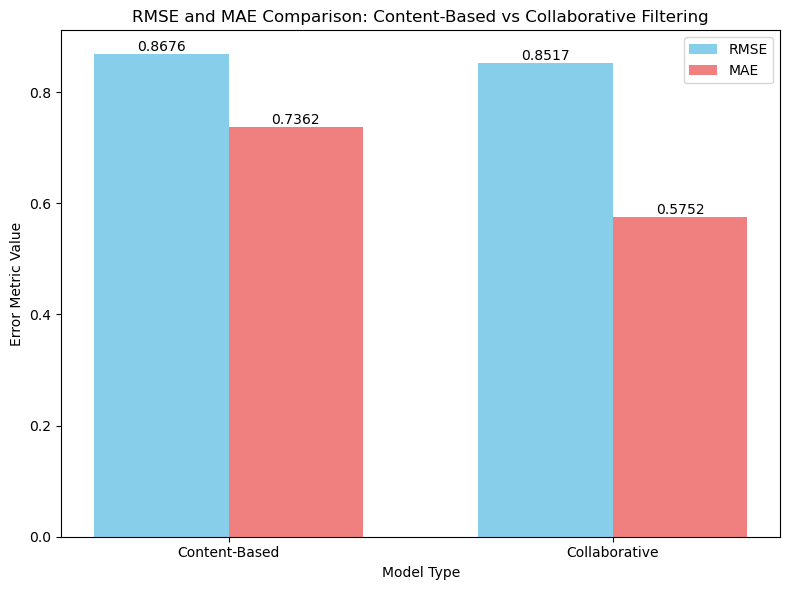

In [85]:
import matplotlib.pyplot as plt
import numpy as np

content_rmse = content_metrics['rmse'] if content_metrics else 0
content_mae = content_metrics['mae'] if content_metrics else 0
collab_rmse = svd_rmse
collab_mae = svd_mae

# Data for plotting
models = ['Content-Based', 'Collaborative']
rmse_values = [content_rmse, collab_rmse]
mae_values = [content_mae, collab_mae]

# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models))

# Plot bars
bars1 = ax.bar(index, rmse_values, bar_width, label='RMSE', color='skyblue')
bars2 = ax.bar(index + bar_width, mae_values, bar_width, label='MAE', color='lightcoral')

# Customize the chart
ax.set_xlabel('Model Type')
ax.set_ylabel('Error Metric Value')
ax.set_title('RMSE and MAE Comparison: Content-Based vs Collaborative Filtering')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', 
                ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()